# Perceptron

퍼셉트론은 가장 단순한 판별 함수 기반 예측 모형이다 (discrimiant function)

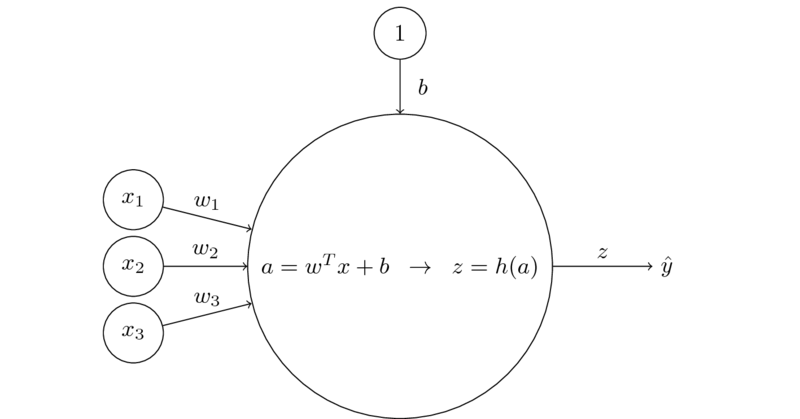

Input 백터 $x = \begin{bmatrix}x_1\\ \vdots\\ x_d \end{bmatrix}\;$ 와 그의 가중치 백터가 있다고 할 때 $\omega = \begin{bmatrix}\omega_1\\ \vdots\\ \omega_d \end{bmatrix}$

그 둘을 곱한 것이 판별함수가 된다.
$f(x) = \omega^Tx$

<br>
$$
\begin{align*} \text{Approve credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i > \text{threshold}, \\
\text{Deny credit if} \;
& \sum\limits_{i=1}^{d}\omega_ix_i < \text{threshold}.
\end{align*}
$$

$$
h(x) = \text{sign} \left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)- \text{threshold} \right) = \text{sign}\left(\left( \sum\limits_{i=1}^{d}\omega_ix_i \right)+ \omega_0\right)
$$

이떄의 sign 함수를 활성화 함수라고 하며, 일반적으로는 Heaviside step function으로 표기한다.

### Perceptron과 logical Operation

Perceptron에 논리적인 operation을 적용해 볼 수 있다. And, Or, Not 과 같은 operation은 사용이 가능하다.

In [7]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 3
weight2 = 2
bias = -4


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                    -4                    0          Yes
      0          1                    -2                    0          Yes
      1          0                    -1                    0          Yes
      1          1                     1                    1          Yes


##### Q. The way to go from an __AND__ perceptron to an __OR__ perceptron

- Decrease the magnitude of the bias
- Increase the weights

### 퍼셉트론의 손실함수

퍼셉트론의 예측 오차를 최소화 해야하는데, 그걸 가중치 $\omega$를 최소화 하면서 찾게 된다. 가중치에 따라 실제값과 예측값이 달라지게 되는데, 전체 예측오차는 i 번째 개별 데이터의 손실함수로 정의할수 있다.
$$
E = \sum_{i=1}^N L(\hat{y}_i, y_i)
$$

$$
L(\hat{y}_i, y_i) = \max(0, -\hat{y}_iy_i)
$$

$$
E = \sum_{i=1}^N \max(0, -\hat{y}_iy_i) = - \sum_{i \in M} \hat{y}_i y_i
$$

### 가중치 계산
$E(\omega)$를 최소화 시키는 가중치는, $\omega$로 미분하여 gradient를 구한다.
$$
\begin{eqnarray}
w_{k+1} 
&=& w_{k} + \eta_k \sum_{i \in M} x_i y_i \\
\end{eqnarray}
$$

여기서 여기에서  η 는 step size 또는 learning rate 이라고 부른다.